##  Aplicaciones de la Descomposición en Valores Singulares (DVS)

En esta notebook se presentan algunos ejemplos y aplicaciones de la descomposición en valores singulares. 

Ya vimos que una matriz $A\in\mathbb{R}^{nxm}$(o $\mathbb{C}^{nxm})$ puede factorizarse como:


$$ A=U\Sigma V^T$$

donde $U$ es una matriz ortogonal de $m$x$m$, $V$ es una matriz ortogonal de $n$x$n$ y $\Sigma$ es
una matriz “diagonal” de $m$x$n$. Si los valores singulares distintos de cero de A son

$$\sigma_1 \geq \sigma_2 \geq \cdots \geq\sigma_r $$

y $\sigma_{r+1}=\cdots=\sigma_{n}=0$ entonces $\Sigma$ tendrá la forma de bloque

$$\Sigma= \begin{bmatrix}{D}&{O}\\{O}&{O}\end{bmatrix}$$

donde, 

 $$D= \begin{bmatrix}
 \sigma_1 & \cdots & 0 \\
  \vdots & \ddots &  \vdots \\
  0 & \cdots & \sigma_n
 \end{bmatrix}$$

Los valores singulares $\sigma_i$ son la raíz cuadrada de los autovalores de $AA^T$.

Además, vimos que las columnas de $U$ se llaman vectores singulares izquierdos de $A$,
y las columnas de $V$ se llaman vectores singulares derechos de $A$. Las matrices $U$ y $V$ no
están determinadas exclusivamente por A, sino que $\Sigma$ debe contener los valores singulares
de A.


En esta notebook se presentan un ejemplo de como calcular la DVS de una matriz y dos posibles aplicaciones. Éstas notas siguen parte del siguiente [tutorial](https://medium.com/@maydos/image-processing-with-singular-value-decomposition-ce8db3f78ce0) de procesamiento de imágenes con Python.

Primero cargamos las librerías necesarias:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

definimos unas funciones simples para poder graficar

In [2]:
def plot2(d1,d2,mapa=None):
    fig,ax = plt.subplots(1,2,figsize=(15,8))    
    ax[0].imshow(d1,aspect='auto',cmap=mapa)
    ax[1].imshow(d2,aspect='auto',cmap=mapa)

def plot3(d1,d2,d3,mapa=None):
    fig,ax = plt.subplots(1,3,figsize=(18,6))
    ax[0].imshow(d1,aspect='auto',cmap=mapa)
    ax[1].imshow(d2,aspect='auto',cmap=mapa)
    ax[2].imshow(d3,aspect='auto',cmap=mapa)

Definimos una matriz $A$

In [3]:
A = np.array([[255, 255,   2,   2,   2],
              [255, 255,   3,   5,  10],
              [4,   4, 255, 253, 255],
              [3,   2, 255, 255, 255],
              [1,   3, 255, 255, 254]])
print(A)

[[255 255   2   2   2]
 [255 255   3   5  10]
 [  4   4 255 253 255]
 [  3   2 255 255 255]
 [  1   3 255 255 254]]


Otra forma de visualizarla es 

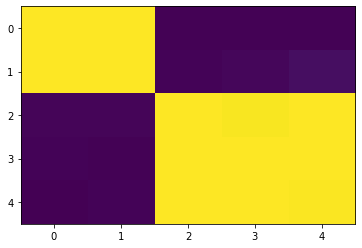

In [4]:
plt.imshow(A,aspect='auto')

Para encontrar la factorización utilizamos una función de la librería Numpy para Python. Ahora $U$ será u, $V^T$ será vh y $\Sigma$ será representada por s.

In [5]:
u, s, vh = np.linalg.svd(A, full_matrices=False)

y podemos ver como son las tres matrices de la factorización

In [6]:
print('U:',np.round(u,2))

U: [[-0.02  0.71  0.68 -0.19  0.03]
 [-0.03  0.71 -0.68  0.2  -0.03]
 [-0.58 -0.02 -0.16 -0.48  0.64]
 [-0.58 -0.02 -0.05 -0.3  -0.76]
 [-0.58 -0.02  0.22  0.78  0.12]]


In [7]:
print('S:',np.diag(np.round(s,2)))

S: [[764.29   0.     0.     0.     0.  ]
 [  0.   509.74   0.     0.     0.  ]
 [  0.     0.     3.73   0.     0.  ]
 [  0.     0.     0.     1.62   0.  ]
 [  0.     0.     0.     0.     1.21]]


In [8]:
print('V:',np.round(vh,2))

V: [[-0.02 -0.02 -0.58 -0.58 -0.58]
 [ 0.71  0.71 -0.02 -0.02 -0.01]
 [-0.06  0.07  0.54  0.26 -0.8 ]
 [-0.57  0.57 -0.4   0.44 -0.03]
 [-0.41  0.41  0.47 -0.64  0.17]]


Para corroborar reconstruimos la matriz ($A_1$) y las comparamos para verificar que es igual $A$

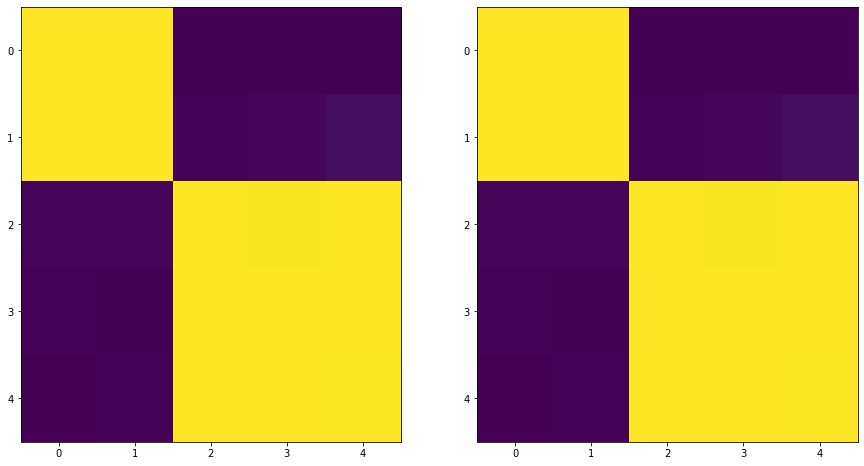

In [9]:
k = len(s)
A1 = np.array(np.dot(u[:,:k],np.dot(np.diag(s[:k]), vh[:k,:])))

plot2(A,A1)

Entonces, saliendo del típico ejemplo de libro para resolver una SVD, podemos pensar a las columnas de $U$ como conceptos o información y las filas de esta matriz como la relación entre las filas de $A$ y dichos conceptos. Lo mismo sucede con las filas de $V$. Luego, los valores de $\Sigma$ pueden pensarse como la magnitud o relevancia de estos conceptos. Por ejemplo en este caso, los dos primeros conceptos (valores singulares de mayor orden de magnitud) son los mas importantes en $A$. Lo que nos dice que los otros pueden pensarse como ruido o algo no deseado que quisieramos eliminar. No aportan "GRAN" información.


Podemos probar lo siguiente. Cambiar la matriz $\Sigma$ dejando los valores mas grandes y poniendo ceros en los valores singulares menores a 250.

In [10]:
s_cleaned = np.array([i if i > 250 else 0 for i in s])

In [11]:
print('nueva S:',np.diag(s_cleaned))

nueva S: [[764.29364506   0.           0.           0.           0.        ]
 [  0.         509.74330048   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.        ]]


Ahora reconstruimos la matriz llamandola img_denoised (primera pista de hacia donde vamos)...

In [12]:
img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int)
k = len(s)

y comparamos con la matriz $A$

In [13]:
print('A1:',img_denoised)
print('A:',A)

A1: [[254 254   0   1   4]
 [255 255   4   5   8]
 [  3   4 254 253 254]
 [  2   2 255 254 255]
 [  1   2 254 254 254]]
A: [[255 255   2   2   2]
 [255 255   3   5  10]
 [  4   4 255 253 255]
 [  3   2 255 255 255]
 [  1   3 255 255 254]]


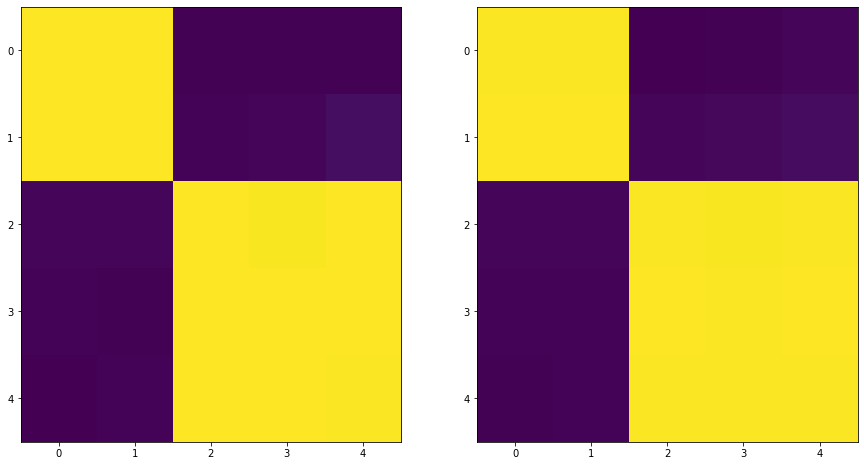

In [14]:
plot2(A,img_denoised)

Tanto comparando los valores de la matriz obtenida como visualizando el resultado se observa que la salida es una matriz muy similar aunque mas suave. 

##  Aplicaciones

### Denoising

Pasemos a un ejemplo un poquito mas divertido. 

Tomemos una matriz $X$ con solo dos elementos distintos de cero y mayores a uno. Y una matriz $Y$ de números aleatorios distribuidos en el rango [0,1). Luego sumamos estas dos matrices creando $Z$.

In [21]:
X = np.zeros((100,100))
Y = np.random.rand(100,100)
X[0,0] = 2.5
X[1,1] = 1.8
Z = X+Y

podemos ver las tres matrices respectivamente. Podemos considerar a la última como la imagen con ruido que queremos remover.

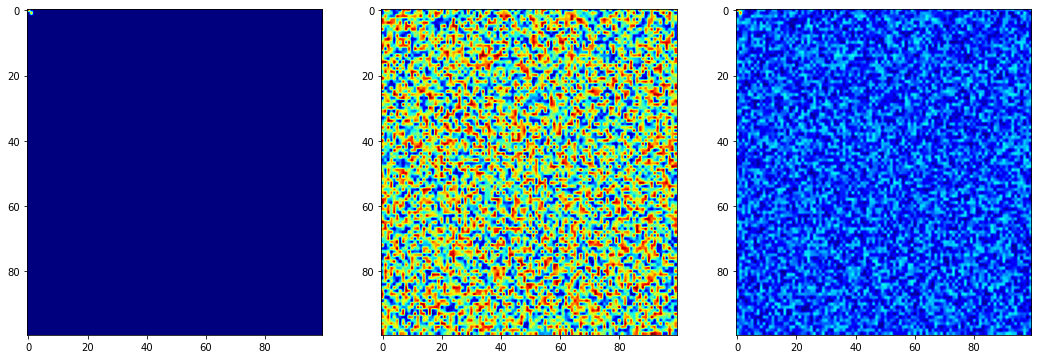

In [22]:
plot3(X,Y,Z,mapa='jet')

Entonces, podríamos utilizar la DVS. Hacemos esto para cada una de las matrices

In [23]:
ux, sx, vhx = np.linalg.svd(X, full_matrices=False)
uy, sy, vhy = np.linalg.svd(Y, full_matrices=False)
uz, sz, vhz = np.linalg.svd(Z, full_matrices=False)

Miremos los valores singulares para $\Sigma$ de la matriz $X$

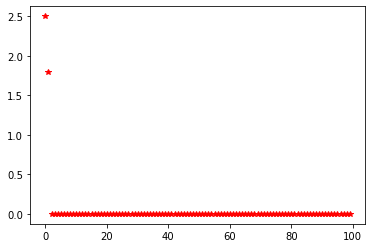

In [24]:
plt.plot(sx,'r*')

Podemos ver que tiene dos valores que resaltan al principio del plot y el resto recaen en el cero. Lo cual es esperable. Luego, miremos que pasa con los valores singulares para $Z$. 

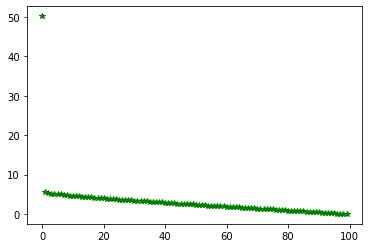

In [25]:
plt.plot(sz,'g*')

Podemos ver que se separa claramente uno de los valores singulares y el resto se "acomoda" en una recta hacia el cero. Es decir, podemos darnos cuenta en función de la información que contienen las matrices (las armamos nosotros) que los valores singulares relacionados al ruido se acercan al cero. Por lo tanto, podriamos quitarlos para intentar remover el ruido. Para esto elegimos un valor umbral mirando el gráfico. Podría ser 7 o 6 o 5  o lo que necesitemos. 

In [42]:
umbral = 4.8
s_cleaned = np.array([si if si > umbral else 0 for si in sz]) # quitamos los valores por abajo de sigma

img_denoised = np.array(np.dot(uz * s_cleaned, vhz), dtype=int) # contruimos A

Una vez que sacamos los valores singulares no deseados veamos como queda la matriz $Z$ modificada

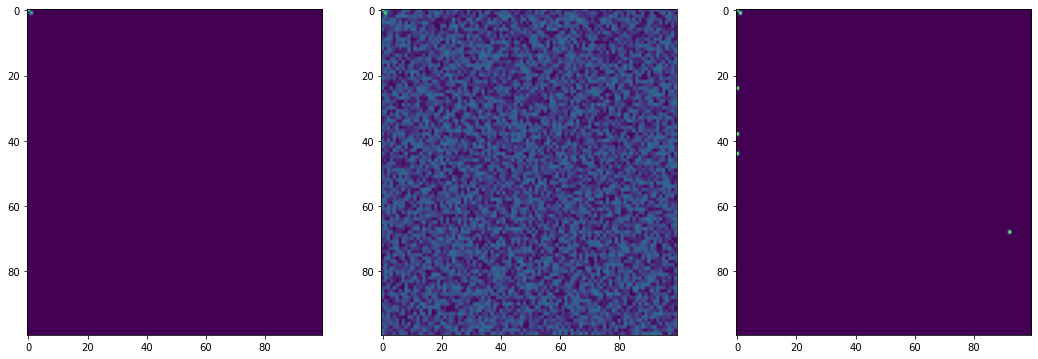

In [43]:
plot3(X,Z,img_denoised)

Los invito a que pruben la ntoebook cambiando los valores de umbral con los valores 4, 4.5, 4.8 y 5. Podemos ver como se remueve el ruido d la imágen pero tabmién como podemos perder información deseada. Por eso hay que hacer siempre una inspección del resultado.

Ahora probemos esto con una imagen real.  Carguemos una foto de nuestra querida Mar del Plata y agreguemos algo de ruido a la imágen.

In [15]:
img = cv2.imread('test1.jpg',0)
f,c = img.shape
n = np.random.rand(f,c)
img1 = img + 200* n # agregamos ruido a la foto

La visualizamos  junto con la imagen con ruido. Pueden verse los pixeles molestos en la segunda imagen.

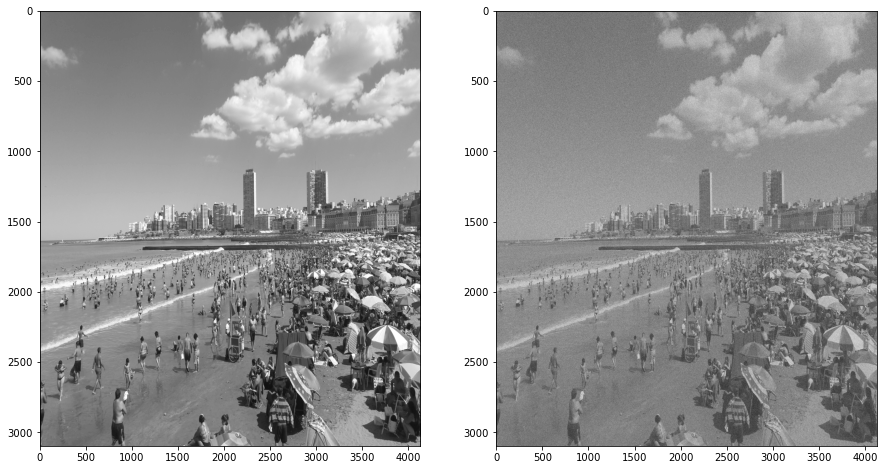

In [16]:
plot2(img,img1,mapa='gray')

Intentemos hacer algo con el ruido similar a lo anterior. Nuevamente descomponemos la matriz A con svd:

In [17]:
u, s, vh = np.linalg.svd(img1, full_matrices=False)

Y ahora miremos los valores singulares...

In [18]:
np.diag(s)

array([[8.69686970e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.16071957e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 4.40155681e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.34385069e+02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.29058967e+02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.20978188e+02]])

Vemos que ya son muchísimos mas que antes y con valores muy distintos. De todas formas lo que podemos hacer es quitar los valores singulares que estén por debajo de algún valor (*threshold*)

In [44]:
umbral1 = 2500 # threshold
 
s_cleaned = np.array([si if si > umbral1 else 0 for si in s]) # quitamos los valores por abajo de sigma

img_denoised = np.array(np.dot(u * s_cleaned, vh), dtype=int) # contruimos A

Miremos las imágenes...

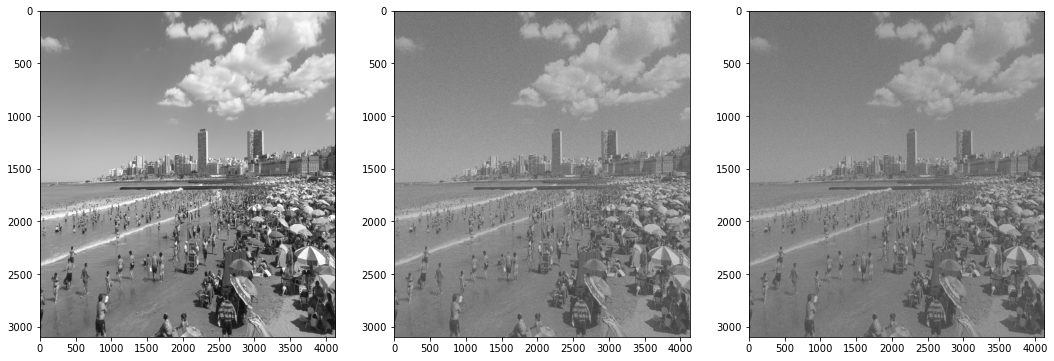

In [20]:
plot3(img,img1,img_denoised,mapa='gray')

Y como esperábamos...Hay que seguir jugando con el umbral o inspeccionar bien los valores singulares. Con el valor elegido, tenemos una imágen con menos ruido y mas suave, pero que claramente no recupera del todo a la imágen original. Al menos habría que probar con otros valores del umbral para ver cuanto mejora. La idea es siempre la misma.

### Compresión de imágenes

Otra aplicación importante que tiene la SVD es la compresión de imágenes. La idea detrás es que algunas partes de la imagen son menos interesantes que otras. Por ejemplo, en una fotografía de alguien de
pie en exteriores, puede haber mucho cielo en el fondo, mientras que el rostro de una persona
contiene muchos detalles. Probablemente podría transmitir cada segundo o tercer
píxel en el fondo, pero le gustaría mantener todos los píxeles en la región de los rostros.
Es evidente que los pequeños valores singulares en la DVS de la matriz $A$ provienen
de las partes “aburridas” de la imagen, y puede ignorar muchas de ellas. Suponga, entonces,
que tiene la DVS de $A$ en forma de producto externo:

$$A = \sigma_1 u_1 v_1^t+...+\sigma_r u_r v_r^t$$
y sea $k \leq r$
$$A_k = \sigma_1 u_1 v_1^t+...+\sigma_k u_k v_k^t$$

Entonces $A_k$ es una aproximación de $A$
que corresponde a mantener sólo los primeros $k$
valores singulares y los correspondientes vectores singulares. Para el ejemplo, puede verse que es suficiente con transmitir sólo los datos correspondientes a
los primeros 50 valores singulares. Tal vez con menos también andaría bien. Todo va a depender de nuestro objetivo.

In [28]:
u, s, vh = np.linalg.svd(img, full_matrices=False)

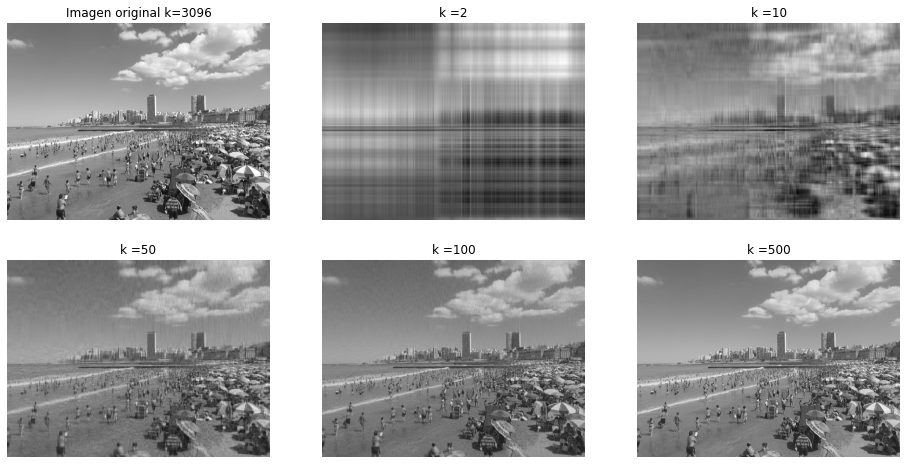

In [29]:
k = [len(s), 2, 10, 50, 100, 500]

plt.figure(figsize = (16, 8))
for i in range(0,6):
  low_rank = np.array(np.dot(u[:,:k[i]],np.dot(np.diag(s[:k[i]]), vh[:k[i],:])))#U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
  if(i  == 0):
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Imagen original k=" + str(k[i]))
  else:
     plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("k =" + str(k[i]))
   

En caso de queres tener la notebook para correr o modificar los ejemplos en google collab o jupyter pueden descargarla desde mi [Github](https://github.com/Geofgabriel/Algebra-II).